## **Classification problem:** predict whether or not the patient died during this hospitalization

In [1]:
import numpy as np
import pandas as pd

In [4]:
data1 = pd.read_csv("dataset.csv")

In [5]:
print(f'''Patient survival dataset has {data1.shape[0]} data points with {data1.shape[1]} variables each.''')

Patient survival dataset has 91713 data points with 85 variables each.


## Exploring data

In [6]:
data1.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [7]:
data1.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [9]:
print(data1.duplicated().sum())
data1=data1.drop_duplicates()
print(data1.duplicated().sum())

0
0


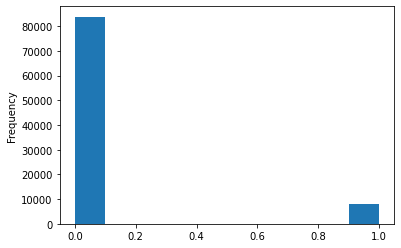

In [10]:
data1['hospital_death'].plot(kind='hist')

In [11]:
data1['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

## Dealing with null values and outliers

In [12]:
data1.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [13]:
data = data1.drop('hospital_death',axis=1) # drop target column

In [14]:

col =  data.loc[:, data.isin([0,1,np.nan]).all()].columns

for c in col:
    data[c]= data[c].replace({1: 'Exist', 0: 'Dose not exist'})
    data.astype({c: 'object'})

data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83
0,66154,25312,118,68.0,22.730000,Dose not exist,Caucasian,M,180.3,Floor,...,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Sepsis,Cardiovascular,NaN
1,114252,59342,81,77.0,27.420000,Dose not exist,Caucasian,F,160.0,Floor,...,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Respiratory,Respiratory,NaN
2,119783,50777,118,25.0,31.950000,Dose not exist,Caucasian,F,172.7,Accident & Emergency,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Metabolic,Metabolic,NaN
3,79267,46918,118,81.0,22.640000,Exist,Caucasian,F,165.1,Operating Room / Recovery,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Cardiovascular,Cardiovascular,NaN
4,92056,34377,33,19.0,NaN,Dose not exist,Caucasian,M,188.0,Accident & Emergency,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Trauma,Trauma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,Dose not exist,Caucasian,M,177.8,Floor,...,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Exist,Sepsis,Cardiovascular,NaN
91709,66119,13486,121,56.0,47.179671,Dose not exist,Caucasian,F,183.0,Floor,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Sepsis,Cardiovascular,NaN
91710,8981,58179,195,48.0,27.236914,Dose not exist,Caucasian,M,170.2,Accident & Emergency,...,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Metabolic,Metabolic,NaN
91711,33776,120598,66,NaN,23.297481,Dose not exist,Caucasian,F,154.9,Accident & Emergency,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Respiratory,Respiratory,NaN


In [15]:
cols = data.select_dtypes(include=np.number).columns # drop all columns with null percentage greater than 50%
for i in cols:
  if int(100*data[i].isnull().sum()/data.shape[0]) >50:
    print(f"colummn {i} deleted having {int(100*data[i].isnull().sum()/data.shape[0])}% nulls .")
    data=data.drop(columns=i)

colummn Unnamed: 83 deleted having 100% nulls .


In [16]:
data = data.drop(labels=['encounter_id','patient_id','hospital_id','icu_id'],axis=1) # drop ID columns
cols = data.select_dtypes(include=np.number).columns.tolist()

In [17]:
cat=data.select_dtypes(include=["bool_","object_","object"]).columns.tolist()

In [18]:
for c in cat:
  data[c] = data[c].fillna(data[c].mode()[0]) # fill categorical nulls with mode
  print(c,':',data[c].isnull().sum())

elective_surgery : 0
ethnicity : 0
gender : 0
icu_admit_source : 0
icu_stay_type : 0
icu_type : 0
apache_post_operative : 0
arf_apache : 0
gcs_unable_apache : 0
intubated_apache : 0
ventilated_apache : 0
aids : 0
cirrhosis : 0
diabetes_mellitus : 0
hepatic_failure : 0
immunosuppression : 0
leukemia : 0
lymphoma : 0
solid_tumor_with_metastasis : 0
apache_3j_bodysystem : 0
apache_2_bodysystem : 0


In [19]:
for c in cols:
  data[c] = data[c].fillna(data[c].mean()) # fill numerical nulls with mean
  print(c,':',data[c].isnull().sum())

age : 0
bmi : 0
height : 0
pre_icu_los_days : 0
weight : 0
apache_2_diagnosis : 0
apache_3j_diagnosis : 0
gcs_eyes_apache : 0
gcs_motor_apache : 0
gcs_verbal_apache : 0
heart_rate_apache : 0
map_apache : 0
resprate_apache : 0
temp_apache : 0
d1_diasbp_max : 0
d1_diasbp_min : 0
d1_diasbp_noninvasive_max : 0
d1_diasbp_noninvasive_min : 0
d1_heartrate_max : 0
d1_heartrate_min : 0
d1_mbp_max : 0
d1_mbp_min : 0
d1_mbp_noninvasive_max : 0
d1_mbp_noninvasive_min : 0
d1_resprate_max : 0
d1_resprate_min : 0
d1_spo2_max : 0
d1_spo2_min : 0
d1_sysbp_max : 0
d1_sysbp_min : 0
d1_sysbp_noninvasive_max : 0
d1_sysbp_noninvasive_min : 0
d1_temp_max : 0
d1_temp_min : 0
h1_diasbp_max : 0
h1_diasbp_min : 0
h1_diasbp_noninvasive_max : 0
h1_diasbp_noninvasive_min : 0
h1_heartrate_max : 0
h1_heartrate_min : 0
h1_mbp_max : 0
h1_mbp_min : 0
h1_mbp_noninvasive_max : 0
h1_mbp_noninvasive_min : 0
h1_resprate_max : 0
h1_resprate_min : 0
h1_spo2_max : 0
h1_spo2_min : 0
h1_sysbp_max : 0
h1_sysbp_min : 0
h1_sysbp_non

In [20]:
# outliers = []
# for c in cols:
#       Q1 = data[c].quantile(0.25)
#       Q3 = data[c].quantile(0.75)
#       IQR = Q3 - Q1

#       upper = data[c][~(data[c]>(Q3+1.5*IQR))].max()
#       lower = data[c][~(data[c]<(Q1-1.5*IQR))].min()
#       data[c] = np.where( data[c] > upper, data[c].mean(),
#        np.where( data[c] < lower, data[c].mean(), data[c] ) )
#       print(c, ":", ((data[c]>(Q3+1.5*IQR)) | (data[c]<(Q1-1.5*IQR))).sum())

In [21]:
data

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.000000,22.730000,Dose not exist,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,Dose not exist,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Sepsis,Cardiovascular
1,77.000000,27.420000,Dose not exist,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,Dose not exist,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Respiratory,Respiratory
2,25.000000,31.950000,Dose not exist,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Metabolic,Metabolic
3,81.000000,22.640000,Exist,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Cardiovascular,Cardiovascular
4,19.000000,29.185818,Dose not exist,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,Dose not exist,Caucasian,M,177.8,Floor,admit,Cardiac ICU,0.298611,...,Dose not exist,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Exist,Sepsis,Cardiovascular
91709,56.000000,47.179671,Dose not exist,Caucasian,F,183.0,Floor,admit,Med-Surg ICU,0.120139,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Sepsis,Cardiovascular
91710,48.000000,27.236914,Dose not exist,Caucasian,M,170.2,Accident & Emergency,admit,Med-Surg ICU,0.046528,...,Dose not exist,Dose not exist,Exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Metabolic,Metabolic
91711,62.309516,23.297481,Dose not exist,Caucasian,F,154.9,Accident & Emergency,admit,Med-Surg ICU,0.081944,...,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Dose not exist,Respiratory,Respiratory


In [22]:
data = data.reset_index(drop=True)

## Feature Scaling

In [23]:
cat = data.select_dtypes(include=["bool_","object_","object"]).columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cat:
    le.fit(data[i])
    data[i]=le.transform(data[i])
data

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.000000,22.730000,0,2,1,180.3,1,0,2,0.541667,...,0,0,1,0,0,0,0,0,9,0
1,77.000000,27.420000,0,2,0,160.0,1,0,5,0.927778,...,0,0,1,0,0,0,0,0,8,6
2,25.000000,31.950000,0,2,0,172.7,0,0,5,0.000694,...,0,0,0,0,0,0,0,0,5,3
3,81.000000,22.640000,1,2,0,165.1,2,0,2,0.000694,...,0,0,0,0,0,0,0,0,0,0
4,19.000000,29.185818,0,2,1,188.0,0,0,5,0.073611,...,0,0,0,0,0,0,0,0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,2,1,177.8,1,0,3,0.298611,...,0,0,1,0,0,0,0,1,9,0
91709,56.000000,47.179671,0,2,0,183.0,1,0,5,0.120139,...,0,0,0,0,0,0,0,0,9,0
91710,48.000000,27.236914,0,2,1,170.2,0,0,5,0.046528,...,0,0,1,0,0,0,0,0,5,3
91711,62.309516,23.297481,0,2,0,154.9,0,0,5,0.081944,...,0,0,0,0,0,0,0,0,8,6


In [24]:
from sklearn.preprocessing import  StandardScaler
Stand= StandardScaler()
numDF = data[cols]
Scaled = pd.DataFrame(Stand.fit_transform(numDF),columns=numDF.columns)

target = data1['hospital_death']
data.drop(cols, axis=1, inplace=True)
data = pd.concat([data,Scaled, target], axis=1)

data

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hospital_death
0,0,2,1,1,0,2,0,0,0,0,...,-5.242957e-02,-0.077393,-0.060685,-0.079120,-1.452686e-01,-3.983978e-01,-0.974794,0.055846,2.910385e-02,0
1,0,2,0,1,0,5,0,0,0,0,...,-1.745822e+00,-1.433391,-1.783767,-0.353262,3.676721e-01,-8.169942e-02,-0.245510,1.619679,1.184559e+00,0
2,0,2,0,0,0,5,0,0,0,0,...,2.939461e-01,0.562939,0.291764,0.000000,3.836487e-16,-1.406423e-15,0.000000,-0.366811,-2.116159e-01,0
3,1,2,0,2,0,2,1,0,0,1,...,-3.988052e-01,0.000000,0.000000,0.123507,-7.122031e-01,1.185094e+00,-0.792473,-0.197748,-6.718405e-02,0
4,0,2,1,0,0,5,0,0,0,0,...,1.400013e-01,-0.115060,0.135120,0.000000,3.836487e-16,-1.406423e-15,0.000000,0.000000,-3.340658e-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,2,1,1,0,3,0,0,0,0,...,-1.130043e+00,-1.471058,-1.157191,2.686137,1.960488e+00,-8.169942e-02,0.483773,0.140378,2.910385e-02,0
91709,0,2,0,1,0,5,0,0,0,0,...,-3.603191e-01,-0.228060,-0.373972,0.028153,1.690519e+00,-7.150962e-01,-0.245510,-0.240014,-1.153280e-01,0
91710,0,2,1,0,0,5,0,0,0,0,...,5.469216e-16,0.000000,0.000000,4.330988,-7.661968e-01,7.100466e-01,-1.339436,-0.155483,-1.153280e-01,0
91711,0,2,0,0,0,5,0,0,0,0,...,5.469216e-16,0.000000,0.000000,0.000000,3.836487e-16,-1.406423e-15,0.000000,-0.070951,-1.153280e-01,0


## Feature Selection

In [25]:
cor = data.corr()
target = 'hospital_death'
cor_target = abs(cor[target])
alpha = 0.064  #np.median(cor_target.values)
relevant_features = cor_target[cor_target>alpha]
print(relevant_features)

elective_surgery                 0.093574
apache_post_operative            0.083674
intubated_apache                 0.171728
ventilated_apache                0.226405
age                              0.106603
apache_2_diagnosis               0.089083
apache_3j_diagnosis              0.089991
gcs_eyes_apache                  0.255160
gcs_motor_apache                 0.276794
gcs_verbal_apache                0.236218
heart_rate_apache                0.107113
resprate_apache                  0.085999
temp_apache                      0.153125
d1_diasbp_min                    0.179225
d1_diasbp_noninvasive_min        0.178564
d1_heartrate_max                 0.162735
d1_mbp_min                       0.194916
d1_mbp_noninvasive_min           0.193877
d1_resprate_max                  0.102807
d1_spo2_min                      0.209462
d1_sysbp_min                     0.209780
d1_sysbp_noninvasive_min         0.208513
d1_temp_min                      0.203179
h1_diasbp_min                    0

In [26]:
len(relevant_features)

41

In [27]:
np.median(cor_target.values)

0.06676097685649654

In [28]:
from imblearn.under_sampling import RandomUnderSampler

# Split the dataset into input and output variables
X1 = data[relevant_features.index].drop('hospital_death', axis=1)
y1 = data['hospital_death']

# Create an object of the RandomUnderSampler class
under_sampler = RandomUnderSampler()

# Perform under-sampling on the dataset
X, y = under_sampler.fit_resample(X1, y1)


In [58]:
data = pd.concat([X,y], axis=1)

In [63]:
data.to_excel("data_cleaned.xlsx", index=False)

## Machine Learning

In [29]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( 
                        X,y,test_size = 0.30, random_state = 101) 

### XGBoost Classifier

In [30]:
import xgboost as xgb
from sklearn import metrics
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2421
           1       0.78      0.80      0.79      2328

    accuracy                           0.79      4749
   macro avg       0.79      0.79      0.79      4749
weighted avg       0.79      0.79      0.79      4749

[[1894  527]
 [ 468 1860]]


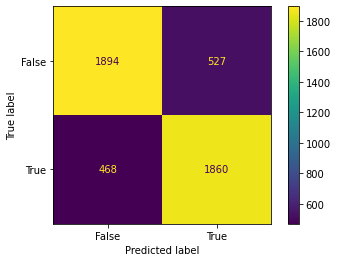

Accuracy: 0.7904822067803748


In [31]:
import matplotlib.pyplot as plt

actual = expected_y
predicted = predicted_y

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7885870709623078


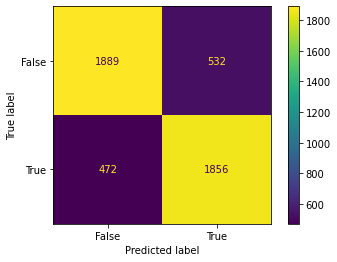

In [33]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### K-Nearest Neighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7342598441777216


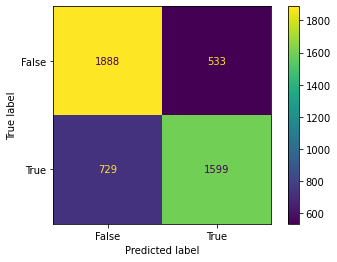

In [35]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Logistic Regression Classifier

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7692145714887345

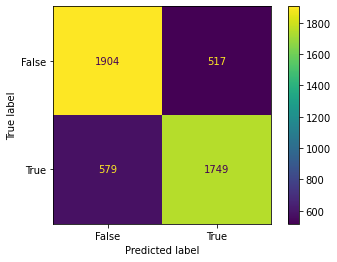

In [37]:
actual = y_test
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7388923983996631


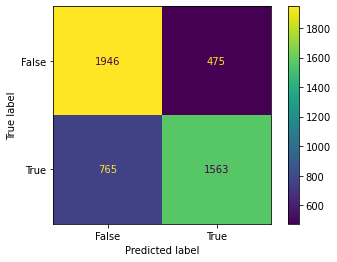

In [39]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7068856601389766


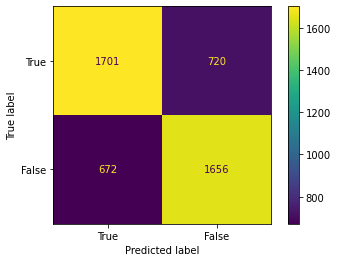

In [41]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

### Support Vector Machine Classifier

we chose linear kernel (when data is linearly seperable) since the logistic regression model gave good accuracy, which means that our data is most probably linearly seperable.

In [42]:
from sklearn.svm import SVC
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)
 
# Model performance
y_pred = svm.predict(X_test)
print('Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.766


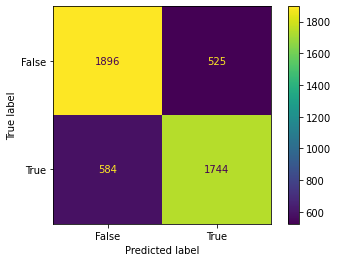

In [43]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Artificial Neural Networks Classifier ANN

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [49]:
def create_my_model():
    mymodel = Sequential()
    mymodel.add(Dense(24, input_dim=40, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel 

model = KerasClassifier(build_fn=create_my_model)
model.fit(X_train, y_train,batch_size= 40,epochs=50)
y_pred=model.predict(X_test)

<ipython-input-49-8239f54e2e7f>:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_my_model)


Epoch 1/50
278/278 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.7104
Epoch 2/50
278/278 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7748
Epoch 3/50
278/278 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.7833
Epoch 4/50
278/278 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7888
Epoch 5/50
278/278 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.7915
Epoch 6/50
278/278 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.7934
Epoch 7/50
278/278 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7960
Epoch 8/50
278/278 [==============================] - 1s 4ms/step - loss: 0.4401 - accuracy: 0.7957
Epoch 9/50
278/278 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7976
Epoch 10/50
278/278 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7970

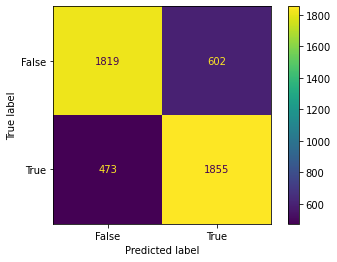

Accuracy: 0.773636555064224


In [57]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print("Accuracy:",metrics.accuracy_score(actual, predicted))